In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [11]:
%ls

01_machine_learning_intro.ipynb     h.py
02_machine_learning_setup.ipynb     images/
03_getting_started_with_iris.ipynb  K_Nearest_Neighbors/
04_model_training.ipynb             K_Nearest_Neighbors.zip
05_model_evaluation.ipynb           Logistic_Regression/
06_linear_regression.ipynb          Logistic_Regression.zip
07_cross_validation.ipynb           maybeFinalDiabetes.ipynb
08_grid_search.ipynb                pima-indians-diabetes.csv
09_classification_metrics.ipynb     README.md
anotherknn.py                       requirements.txt
Classification_Template/            Some disease.ipynb
Classification_Template.zip         styles/
HelloWorld.ipynb                    Text.txt


In [12]:
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
data = pd.read_csv('pima-indians-diabetes.csv', names=col_names)

In [13]:
data.count() #A pdas handy function to see the count of all the data

pregnant    768
glucose     768
bp          768
skin        768
insulin     768
bmi         768
pedigree    768
age         768
label       768
dtype: int64

In [14]:
data.head() #Most of the times we see the head of the data to see how our
#############data are arranged, or what data typr they are in

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


([<matplotlib.axis.YTick at 0x7f8afe78b3c8>,
 <a list of 9 Text yticklabel objects>)

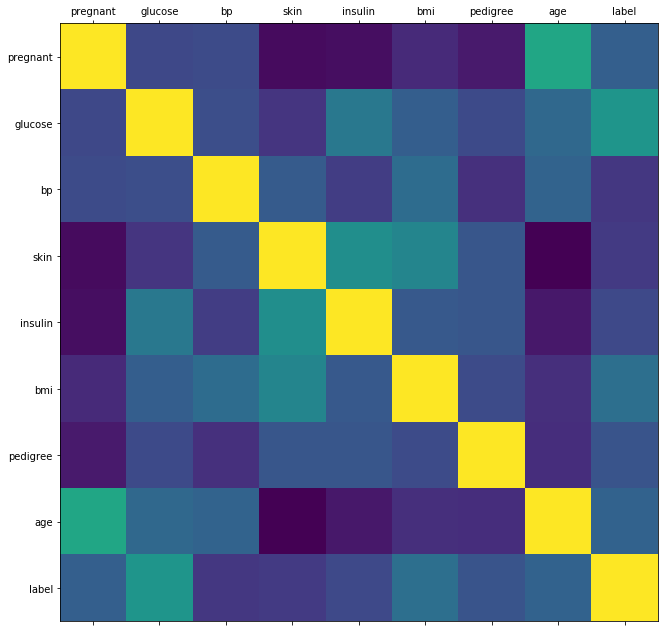

In [15]:
corr=data.corr()


fig, ax = plt.subplots(figsize=(11, 11))
ax.matshow(corr)
plt.xticks(range(len(corr.columns)), corr.columns)
plt.yticks(range(len(corr.columns)), corr.columns)


In [16]:
data.corr() #correlation

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
pregnant,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
bp,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
skin,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
bmi,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
pedigree,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
label,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


# We have 768 labeled data with either 1 or 0
# Now we split our data into X(feature) and y(result)

In [17]:
from sklearn.model_selection import train_test_split

feature_col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age']
predicted_class_names = ['label']

X = data[feature_col_names].values # predictor feature columns (8 X m)
y = data[predicted_class_names].values # predicted class (1=true, 0=false) column (1 X m)
split_test_size = 0.30

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=split_test_size, random_state=42)

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=3)
#print(y_test)

## Now some simple things if we ever need

In [19]:
y_train.mean()

0.3263888888888889

In [20]:
from sklearn.neighbors import KNeighborsClassifier

In [21]:
knn = KNeighborsClassifier(n_neighbors=15)

In [22]:
knn.fit(X_train, y_train.ravel())

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=15, p=2,
           weights='uniform')

In [23]:
y_expected = knn.predict(X_test)

In [24]:
from sklearn.metrics import confusion_matrix

In [25]:
cm = confusion_matrix(y_expected,y_test)

In [26]:
print(cm)

[[99 42]
 [13 38]]


In [27]:
"""
print("Right : " + str( cm[0,0] + cm[1,1]))
print("wrong : " + str( cm[0,1] + cm[1,0]))
print("Accuracy : " + str(  ( cm[0,0] + cm[1,1] ) / y_test.count() ) ) 
"""
print(knn.score(X_test, y_test))

0.7135416666666666


In [28]:
pd.crosstab(y_test.ravel(), y_expected, rownames=["True"], colnames= ["Predicted"], margins=True)

Predicted,0,1,All
True,,,
0,99,13,112
1,42,38,80
All,141,51,192


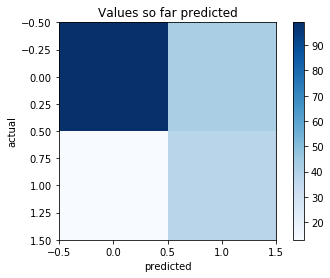

In [29]:
plt.imshow(cm, cmap=plt.cm.Blues, interpolation='nearest')
plt.title("Values so far predicted")
plt.colorbar()
plt.xlabel('predicted')
plt.ylabel('actual')
plt.show()

[[-1.   -0.98 -0.96 ... 17.94 17.96 17.98]
 [20.   20.   20.   ... 81.98 81.98 81.98]]


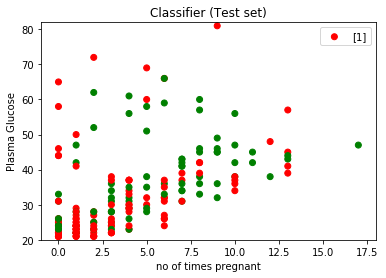

In [48]:
from matplotlib.colors import ListedColormap

X, y = X_test, y_test


step_size_in_mesh = 0.02

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 7].min() - 1, X[:, 7].max() + 1


X1, X2 = np.meshgrid(np.arange(x_min, x_max, step_size_in_mesh), np.arange(y_min, y_max, step_size_in_mesh))


print(np.array([X1.ravel(), X2.ravel()]))

Z = knn.predict(np.array(X_test))


#plt.contourf(X1, X2, Z,alpha = 0.75, cmap = ListedColormap(('red', 'green')))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())



#print(np.array(y).size )

#plt.contourf(X1, X2, [[z] for z in Z],alpha = 0.75, cmap = ListedColormap(('red', 'green')))

#for i, j in enumerate(y):
#    print(i,j)
pointsTrue = []
colors = []
for i, j in enumerate(y):
    if j == [1]:
        pointsTrue.append(i)
        colors.append('green')
    else:
        pointsTrue.append(i)
        colors.append('red')

plt.scatter(X[pointsTrue, 0], X[pointsTrue, 7],c = colors, label = j)
    

plt.title('Classifier (Test set)')
plt.xlabel('no of times pregnant')
plt.ylabel('Plasma Glucose')
plt.legend()
plt.show()